Import the relevant python libraries

In [1]:
!pip install -U matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)


In [2]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\nitza\anaconda3\lib\site-packages (0.11.2)


In [3]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from functools import reduce

## Statistical Data Analysis Project

### Project Description:

We recived 5 CSV files, with data from telecom operator, representing the transacations of the services that were consumed during 2018 by a sample of 500 clients. we also received data about the clients, and about the 2 offered prepaid plans.
We were asked to carry out a preliminary analysis of the plans. to analyze clients' behavior and determine which prepaid plan brings in more revenue.

### The method:
First step is the data preprocessing. After understanding the data general information and main issues, we try to solve them. taking care of null values if found, changing data type as required, and adding some new columns to make the analysis easier.
Next main step was to learn the data measures of location and dispersion, using exploratory data analysis tools. 
we grouped the transactions of each service total use by user_id and month, and then merged all the services, user info and tariff info into one dataframe.
Analysis - 

## Open the data files and study the general information
### store it in designated variables

In [4]:
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    text = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    calls = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    text = pd.read_csv('megaline_messages.csv')
    plans = pd.read_csv('megaline_plans.csv')
    users = pd.read_csv('megaline_users.csv')    

### Study the general information with the methods of .info(), .describe(), .sample(), etc.

That was done together with step 2

## Data preparation - Convert the data to the necessary types, find and eliminate errors 


### Users data

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,NaN
365,1365,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,surf,NaN
313,1313,Antoine,Baker,49,"San Francisco-Oakland-Berkeley, CA MSA",2018-05-24,surf,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
79,1079,Brian,Mccall,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-26,surf,NaN


#### Converting data types:

In [7]:
# We have to convert the 'reg_date' and 'churn_date' from object to date type.
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')

#### Looking for and handling missing values:

In [8]:
# What is the rate of null values for each column?
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [9]:
# There are null values in column 'churn_date'. The meaning of this column is the user's subscription end-date.
# NaN in this colum means the user is still active. Since we are dealing only with 2018 data,
# we can set NaN churn date to '2018-12-31'
users.fillna(pd.to_datetime('2018-12-31'),inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Looking for duplicates:

In [10]:
users.duplicated().sum()

0

In [11]:
# There are no duplicated rows where all the colums are duplicate.
users.duplicated(['user_id']).sum()

0

There also no duplicated user_id, so we know that all the rest is ok (users' data can have duplication on other columns)

#### Conclusions:
- We have 500 entries of indevidual users information (no duplication)
- We had to convert date columns from 'object' to 'date' data type
- We found NaN values in the 'churn_date' column and filled it with December 31st 2018 (last day of the year we are analysing)

### Calls data

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
calls.sample()

,id,user_id,call_date,duration
25408,1098_76,1098,2018-11-08,0.0


In [14]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


#### Looking for and handling missing values:

In [15]:
# What is the rate of null values for each column?
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

#### Looking for duplicates:

In [16]:
calls.duplicated().sum()

0

- There are no null values and no duplicated rows in calls df

#### I want to find out what is the place and ratio of calls with 0 duration, to decide how to handle them.

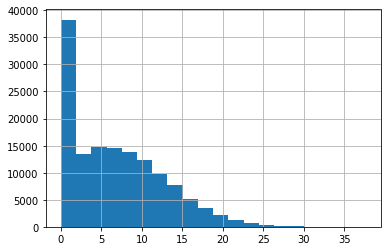

In [17]:
calls['duration'].hist(bins = 20);

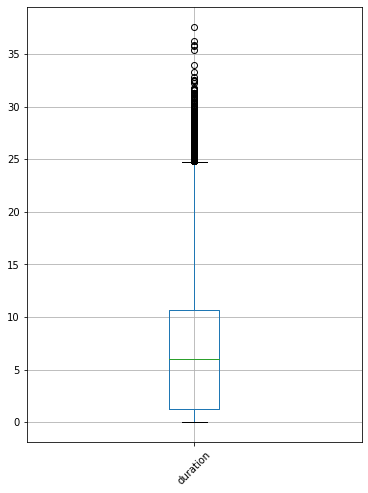

In [18]:
calls.boxplot(column='duration',fontsize = 10, rot = 45,grid = True,figsize = (6,8));

In [19]:
calls['duration'][calls['duration'] == 0].count()/calls['duration'].count()

0.1948233927469416

Calls with 0 duration are about 20% of the calls. it's not a negligible rate, and can influence the results of the study, but only if it differs a lot between the two plans (I would prefer not to handle these calls as real calls, but missed calls).
so I split the users in two, according to their plan, and checked the distribution and ratio of 0 duration calls:

<AxesSubplot:>

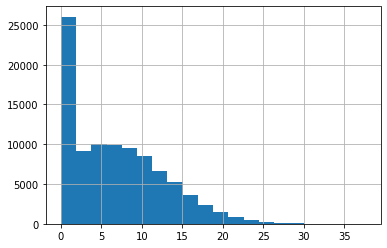

In [20]:
surf_users = users.query('plan == "surf"')
surf_calls = calls.query('user_id in @surf_users.user_id')
surf_calls['duration'][surf_calls['duration'] == 0].count()/surf_calls['duration'].count()
surf_calls['duration'].hist(bins = 20)

<AxesSubplot:>

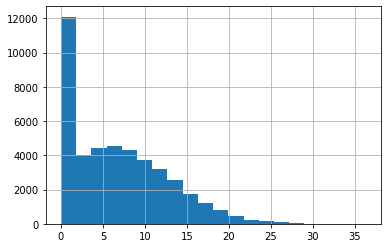

In [21]:
ult_users = users.query('plan == "ultimate"')
ult_calls = calls.query('user_id in @ult_users.user_id')
ult_calls['duration'][ult_calls['duration'] == 0].count()/ult_calls['duration'].count()
ult_calls['duration'].hist(bins = 20)

####  Convert 'call_date' to date type datetime

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

####  Clean the data of calls performed before the registration date or efter the churn date

In [23]:
# Make a copy of the original calls dataframe for our manipulations
real_calls = calls
real_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [24]:
# Defining a function that for each user_id, looks for calls that are dated out of the period between 
# registration and churn date, and fills temp column with 0.

def users_activity_log(row):
    user_id=row['user_id']
    reg_date=row['reg_date']
    end_date=row['churn_date']    
    #print('User: ', user_id, ' ', reg_date, ' ',end_date)
    
    real_calls.loc[(real_calls['user_id'] == user_id) &
                   ((real_calls['call_date'] < reg_date) |
                    (real_calls['call_date'] > end_date)), ['temp']] = 0

In [25]:
# now we apply our function to every user_id.
# before that, define a temp column and set it with default = 1
real_calls['temp'] = 1
users.apply(users_activity_log,axis=1);

In [26]:
# This line will remove all the rows with temp=0
real_calls = real_calls[~(real_calls['temp'] == 0)] 

In [27]:
real_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134774 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         134774 non-null  object        
 1   user_id    134774 non-null  int64         
 2   call_date  134774 non-null  datetime64[ns]
 3   duration   134774 non-null  float64       
 4   temp       134774 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 6.2+ MB


#### Conclusions:
- Converting data types: we have to convert the 'call_date' to a date type. the duration will be converted to int later, after caculation the totals.

- There are no null values in the calls data

- calls with 0 duration: Have the same distribution and ratio (20%) in both plans, so ignoring them would not effect the analysis. We will drop this rows, so they will not influence the mean call duration.
Later when I merge all the data, the users df will be the basis (left merge), so users with no rows of data in calls/text/internet will not be lost.

- I cleaned 2,961 rows of calls that are dated before the registration date or after thechurn date.

#### Drop the 0 call duration rows

In [28]:
#real_calls = real_calls.query('duration > 0') 

### Internet data

In [29]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
internet.head()
internet.tail()

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31


In [31]:
# What is the rate of null values for each column?
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [32]:
internet.duplicated().sum()

0

#### I want to find out what is the place and ratio of sessions with 0 mb_used, to decide how to handle them.

<AxesSubplot:>

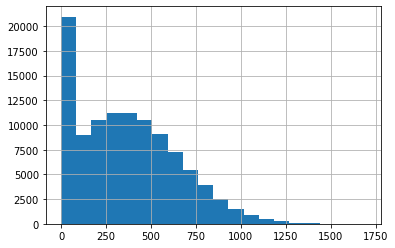

In [33]:
internet['mb_used'].hist(bins = 20)

<AxesSubplot:>

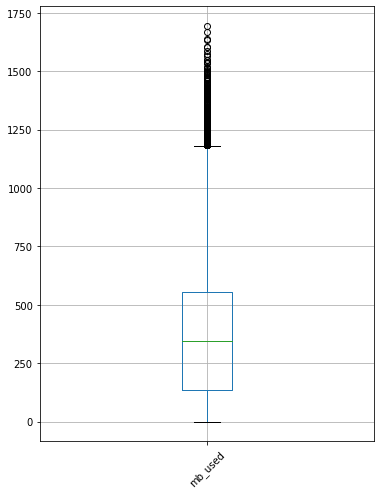

In [34]:
internet.boxplot(column='mb_used',fontsize = 10, rot = 45,grid = True,figsize = (6,8))

In [35]:
internet['mb_used'][internet['mb_used'] == 0].count()/internet['mb_used'].count()

0.1311423801574052

As with the calls, we have sessions with 0 'mb_used'. they're about 13% of the sessions. it can influence the results of the analysis if this rate differs a lot between the two plans (I would prefer not to handle these sessions as real, but as dissconected ones)
so I used the surf_users and ult_users variables, and checked the distribution and ratio of 0 mb_used sessions:

<AxesSubplot:>

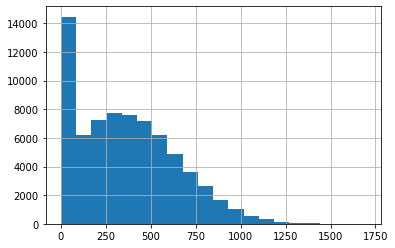

In [36]:
surf_sessions = internet.query('user_id in @surf_users.user_id')
surf_sessions['mb_used'][surf_sessions['mb_used'] == 0].count()/surf_sessions['mb_used'].count()
surf_sessions['mb_used'].hist(bins = 20)

<AxesSubplot:>

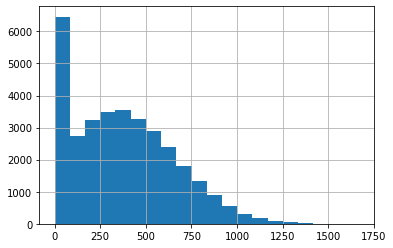

In [37]:
ult_sessions = internet.query('user_id in @ult_users.user_id')
ult_sessions['mb_used'][ult_sessions['mb_used'] == 0].count()/ult_sessions['mb_used'].count()
ult_sessions['mb_used'].hist(bins = 20)

#### Conclusions:
- There are no null values in the internet data

- sessions with 0 mb_used: Have the same distribution and ratio in both plans, so ignoring them would not effect the analysis. I want to drop these rows, because I don't want them to influence the mb_used mean.

- Converting data types: we have to convert the 'session_date' to a date type. 'mb_used' will be converted to int later, after caculation the totals.

####  Convert 'session_date' to date type

In [38]:
# Converting 'session_date' from object type to datetime type
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Clean internet sessions that are dated before the registration date or after the churn date

In [39]:
real_internet = internet

In [40]:
# Defining a function that for each user_id, looks for calls that are dated out of the period between 
# registration and churn date, and fills temp column with 0.

def users_activity_int(row):
    user_id=row['user_id']
    reg_date=row['reg_date']
    end_date=row['churn_date']    
    #print('User: ', user_id, ' ', reg_date, ' ',end_date)
    
    real_internet.loc[(real_internet['user_id'] == user_id) &
                   ((real_internet['session_date'] < reg_date) |
                    (real_internet['session_date'] > end_date)), ['temp']] = 0

In [41]:
# now we apply our function to every user_id.
# before that, define a temp column and set it with default = 1
real_internet['temp'] = 1
users.apply(users_activity_int,axis=1);

In [42]:
# This line will remove all the rows with temp=0
real_internet = real_internet[~(real_internet['temp'] == 0)] 

In [43]:
len(real_internet)

102362

#### Drop the 0 call duration rows

In [44]:
#real_internet = real_internet.query('mb_used > 0') 

I cleaned the sessions that are dated before the registration date or after thechurn date.
   Added checking for missing values & duplicates.
    
I decided not to drop the 0 duration calls, since they are not going to influence the mean statistic (the means are calculated from the monthly total calls duration)<p>

### text messages data

In [45]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [46]:
text.head()
text.tail()
text.sample()

,id,user_id,message_date
18572,1120_415,1120,2018-04-17


In [47]:
# checking for null values
text.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [48]:
# checking for duplicates
text.duplicated().sum()

0

#### Conclusions:
- There are no null values in the text messages data

- There are no duplicate values

- this data is not numerical. each row represents a text message with its data. for our analysis we will count the number of rows.

- Converting data types: we have to convert the 'message_date' from object to a date type.

####  Convert 'message_date' to date type

In [49]:
# Converting 'session_date' from object type to datetime type
text['message_date'] = pd.to_datetime(text['message_date'],format='%Y-%m-%d')
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Clean text messages that are dated before the registration date or after the churn date

In [50]:
real_text = text

In [51]:
# Defining a function that for each user_id, looks for calls that are dated out of the period between 
# registration and churn date, and fills temp column with 0.

def users_activity_txt(row):
    user_id=row['user_id']
    reg_date=row['reg_date']
    end_date=row['churn_date']    
    #print('User: ', user_id, ' ', reg_date, ' ',end_date)
    
    real_text.loc[(real_text['user_id'] == user_id) &
                   ((real_text['message_date'] < reg_date) |
                    (real_text['message_date'] > end_date)), ['temp']] = 0

In [52]:
# now we apply our function to every user_id.
# before that, define a temp column and set it with default = 1
real_text['temp'] = 1
users.apply(users_activity_txt,axis=1);

In [53]:
# This line will remove all the rows with temp=0
#real_text = real_text[~(real_text['temp'] == 0)] 
len(real_text)

76051

### Plans data

In [54]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [55]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Conclusions:
-There are no null values in the plans data

-The data types fit the data, no need for conversions.

### Calculating users' total use and total revenue per month

#### Grouping calls data by month (after creating 'month' column and rounding up the duration)

In [56]:
real_calls['month'] = real_calls['call_date'].dt.month
real_calls['rounded_duration'] = real_calls['duration'].apply(np.ceil)

In [57]:
users_monthly_calls = real_calls.groupby(['user_id','month']).agg(
    total_calls=('rounded_duration', 'count'), total_duration=('rounded_duration', 'sum'),)
users_monthly_calls

total_calls  total_duration
user_id month                             
1000    12              16           124.0
1001    8               27           182.0
        9               49           315.0
        10              65           393.0
        11              64           426.0
...                    ...             ...
1498    12              39           339.0
1499    9               41           346.0
        10              53           385.0
        11              45           308.0
        12              65           496.0

[2221 rows x 2 columns]

#### Grouping text messages data by month (after creating 'month' column)

In [58]:
real_text['month'] = real_text['message_date'].dt.month

In [59]:
users_monthly_txt = real_text.groupby(['user_id','month']).agg(total_txt=('id', 'count'))

In [60]:
users_monthly_txt

total_txt
user_id month           
1000    12            11
1001    8             30
        9             44
        10            53
        11            36
...                  ...
1496    9             21
        10            18
        11            13
        12            11
1497    12            50

[1806 rows x 1 columns]

#### Grouping internet data by month (after adding 'month' column) and rounding up the MB to GB

In [61]:
real_internet['month'] = real_internet['session_date'].dt.month

In [62]:
users_monthly_mb = real_internet.groupby(['user_id','month']).agg(total_mb=('mb_used', 'sum'))
users_monthly_mb['total_gb'] = (users_monthly_mb['total_mb']/1024).apply(np.ceil)
users_monthly_mb['total_mb_rounded'] = users_monthly_mb['total_gb']*1024

In [63]:
users_monthly_mb

total_mb  total_gb  total_mb_rounded
user_id month                                      
1000    12      1901.47       2.0            2048.0
1001    8       6919.15       7.0            7168.0
        9      13314.82      14.0           14336.0
        10     22330.49      22.0           22528.0
        11     18504.30      19.0           19456.0
...                 ...       ...               ...
1498    12     23137.69      23.0           23552.0
1499    9      12984.76      13.0           13312.0
        10     19492.43      20.0           20480.0
        11     16813.83      17.0           17408.0
        12     22059.21      22.0           22528.0

[2240 rows x 3 columns]

#### Merging the 3 dataframes to one df including each user's monthly use of all types of services

In [64]:
data_frames = [users_monthly_calls, users_monthly_txt, users_monthly_mb]
users_monthly_use = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).fillna(0)
users_monthly_use.reset_index(level='month', inplace=True)
len(users_monthly_use)

2285

#### Merging user dataframe with the monthly services use df

In [65]:
#merging rows of each month use (+ his plan and city for later analysis)
# with the users date from 'users' datafram

users_monthly_use_plan = pd.merge(users_monthly_use,users[['user_id','city','plan','reg_date','churn_date']],on='user_id', how='left')
len(users_monthly_use_plan)

2285

#### Adding for each row, the plans details by merging the plans df

In [66]:
users_monthly_use_plan = pd.merge(users_monthly_use_plan,plans,left_on='plan', right_on = 'plan_name').fillna(0)
len(users_monthly_use_plan)

2285

In [67]:
# Drop the redundent "plan_name" column
users_monthly_use_plan = users_monthly_use_plan.drop(columns='plan_name')

#### Calculating users' monthly payments

In [68]:
# Defining a function which calculates for each row (per user and month), the total payments 
# The function returns the total payment

def find_cost(row):
    # we're creating variables of calls_mi,text,internet,plan inside the function
    # we can operate them for each user
    calls_mi=row['total_duration']
    text_used=row['total_txt']
    mb_used=row['total_mb_rounded']
    plan=row['plan']
    calls_cost = 0
    text_cost = 0
    internet_cost = 0
    total_cost = 0
    
    #let's find the monthly cost for calls
    calls_cost = (calls_mi > row.minutes_included) * (calls_mi - row.minutes_included) * row.usd_per_minute

    
    # let's find the monthly cost for messages
    text_cost = (text_used > row.messages_included) * (text_used - row.messages_included) * row.usd_per_message

    
    # let's find the monthly cost for internet use
    internet_cost = (mb_used > row.mb_per_month_included) * ((mb_used - row.mb_per_month_included)/1024) * row.usd_per_gb

    
    #now calculate the total cost by summing it all up and adding the monthly pay
    total_cost=calls_cost+text_cost+internet_cost+row.usd_monthly_pay

    return total_cost

In [69]:
# now we apply our function to every row of the data.
users_monthly_use_plan['total_cost'] = users_monthly_use_plan.apply(find_cost,axis=1)

In [70]:
users_monthly_use_plan.describe()

,user_id,month,total_calls,total_duration,total_txt,total_mb,total_gb,total_mb_rounded,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000
mean,1246.656455,9.164551,58.982057,421.387746,33.282713,16465.685182,16.573304,16971.063457,348.512035,20186.468271,1285.557987,35.711160,9.057330,0.023716,0.023716,63.651510
std,142.819865,2.496594,33.031577,240.658985,34.073009,8167.889475,8.004404,8196.509345,441.091992,7131.761056,1160.768401,23.215368,1.392922,0.009286,0.009286,46.525699
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,20.000000
25%,1122.000000,8.000000,36.000000,255.000000,4.000000,11856.730000,12.000000,12288.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,22.430000
50%,1245.000000,10.000000,59.000000,418.000000,26.000000,16689.730000,17.000000,17408.000000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,70.000000
75%,1368.000000,11.000000,79.000000,566.000000,51.000000,20917.540000,21.000000,21504.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,70931.590000,70.000000,71680.000000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,590.370000


## Analysing the data
Calculated the mean use of each service by user.

Ploted mean distribution histograms

Showed the dispersion of the mean around the median with boxplot

Calculated the mean use per month and showed it in bar graph

Calculated the users' use standard deviation ditribution for each service and for the total cost

In [71]:
# Let's slice the data to different variables according to the plan
surf_data = users_monthly_use_plan.query('plan == "surf"')
ultimate_data = users_monthly_use_plan.query('plan == "ultimate"')

In [72]:
surf_data.describe()
surf_data.head()

,user_id,month,total_calls,total_duration,total_txt,total_mb,total_gb,total_mb_rounded,city,plan,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
718,1001,8,27.0,182.0,30.0,6919.15,7.0,7168.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,2018-08-13,2018-12-31,50,15360,500,20,10,0.03,0.03,20.00
719,1001,9,49.0,315.0,44.0,13314.82,14.0,14336.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,2018-08-13,2018-12-31,50,15360,500,20,10,0.03,0.03,20.00
720,1001,10,65.0,393.0,53.0,22330.49,22.0,22528.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,2018-08-13,2018-12-31,50,15360,500,20,10,0.03,0.03,90.09
721,1001,11,64.0,426.0,36.0,18504.30,19.0,19456.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,2018-08-13,2018-12-31,50,15360,500,20,10,0.03,0.03,60.00
722,1001,12,56.0,412.0,44.0,19369.18,19.0,19456.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,2018-08-13,2018-12-31,50,15360,500,20,10,0.03,0.03,60.00


In [73]:
ultimate_data.describe()

,user_id,month,total_calls,total_duration,total_txt,total_mb,total_gb,total_mb_rounded,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.0,718.0,718.0,718.0,7.180000e+02,7.180000e+02,718.000000
mean,1253.896936,9.144847,59.577994,423.015320,37.655989,16921.973914,17.015320,17423.688022,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,72.300836
std,150.742886,2.558911,33.938108,245.279281,34.758943,8106.537871,7.933548,8123.953390,0.0,0.0,0.0,0.0,0.0,1.510262e-16,1.510262e-16,11.402306
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
25%,1126.500000,8.000000,35.000000,248.250000,7.000000,12454.315000,13.000000,13312.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
50%,1246.000000,10.000000,61.000000,421.000000,30.000000,16724.625000,17.000000,17408.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
75%,1401.000000,11.000000,79.000000,563.000000,61.000000,20938.127500,21.000000,21504.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,70.000000
max,1497.000000,12.000000,191.000000,1369.000000,166.000000,46595.330000,46.000000,47104.000000,1000.0,30720.0,3000.0,70.0,7.0,1.000000e-02,1.000000e-02,182.000000


### Means analysis
#### Users' mean monthly use histograms

In [74]:
#Aggregate minutes (call duration) mean by user
uc = ultimate_data.pivot_table(index = 'user_id', values='total_duration',aggfunc='mean')
sc = surf_data.pivot_table(index = 'user_id', values='total_duration',aggfunc='mean')

#Aggregate text messages mean by user
ut = ultimate_data.pivot_table(index = 'user_id', values='total_txt',aggfunc='mean')
st = surf_data.pivot_table(index = 'user_id', values='total_txt',aggfunc='mean')

#Aggregate data mb used mean by user
ud = ultimate_data.pivot_table(index = 'user_id', values='total_mb_rounded',aggfunc='mean')
sd = surf_data.pivot_table(index = 'user_id', values='total_mb_rounded',aggfunc='mean')

#Aggregate total_cost mean by user
utc = ultimate_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='mean')
stc = surf_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='mean')

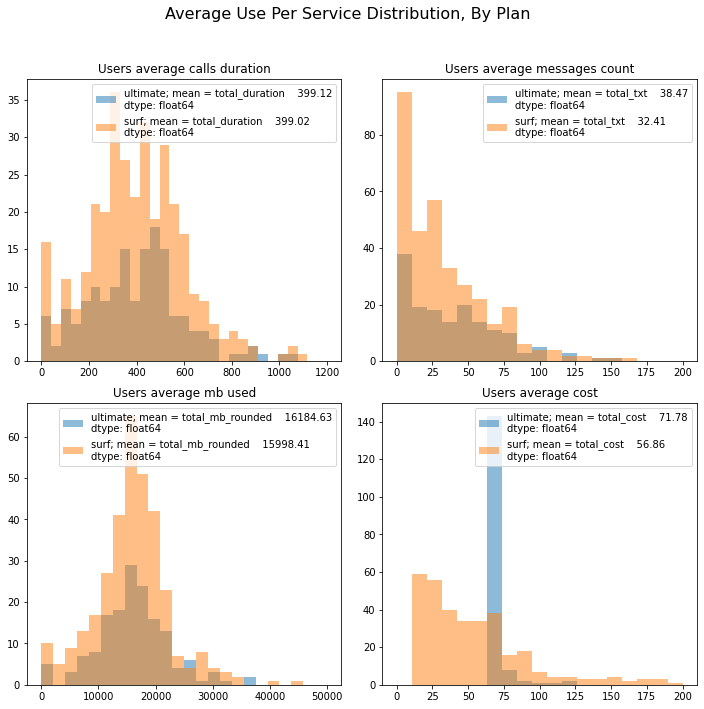

In [75]:
#### Plot the histograms in 2X2 subplot figure
fig, axarr = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle("Average Use Per Service Distribution, By Plan", fontsize=16)

# Minutes graph
bins = np.linspace(0, 1200, 30)
axarr[0, 0].hist(uc.values, bins, alpha=0.5, label='ultimate; mean = {0}'.format(round(np.mean(uc),2)))
axarr[0, 0].hist(sc.values, bins, alpha=0.5, label='surf; mean = {0}'.format(round(np.mean(sc),2)))
axarr[0, 0].set_title('Users average calls duration')
axarr[0, 0].legend(loc='upper right')

# Messages graph 0-166
bins = np.linspace(0, 200, 20)
axarr[0, 1].hist(ut.values, bins, alpha=0.5, label='ultimate; mean = {0}'.format(round(np.mean(ut),2)))
axarr[0, 1].hist(st.values, bins, alpha=0.5, label='surf; mean = {0}'.format(round(np.mean(st),2)))
axarr[0, 1].set_title('Users average messages count')
axarr[0, 1].legend(loc='upper right')

# Internet graph   0-50000 
bins = np.linspace(0, 50000, 25)
axarr[1, 0].hist(ud.values, bins, alpha=0.5, label='ultimate; mean = {0}'.format(round(np.mean(ud),2)))
axarr[1, 0].hist(sd.values, bins, alpha=0.5, label='surf; mean = {0}'.format(round(np.mean(sd),2)))
axarr[1, 0].set_title('Users average mb used')
axarr[1, 0].legend(loc='upper right')

# Total cost graph 0-180
bins = np.linspace(0, 200, 20)
axarr[1, 1].hist(utc.values, bins, alpha=0.5, label='ultimate; mean = {0}'.format(round(np.mean(utc),2)))
axarr[1, 1].hist(stc.values, bins, alpha=0.5, label='surf; mean = {0}'.format(round(np.mean(stc),2)))
axarr[1, 1].set_title('Users average cost')
axarr[1, 1].legend(loc='upper right');

fig.tight_layout()
fig.subplots_adjust(top=0.88)

#### Users' mean monthly use boxplot

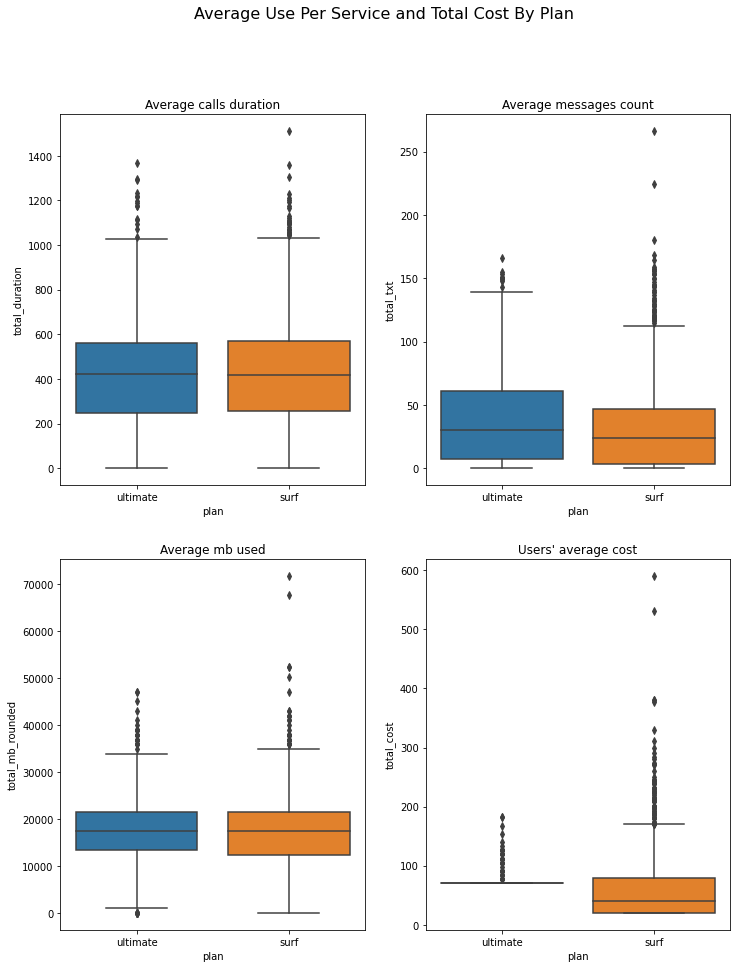

In [76]:
# Using boxplot graph, we can observe the dispertion of the variable around the median
fig, axes = plt.subplots(2, 2, figsize=(12, 15))
  
fig.suptitle('Average Use Per Service and Total Cost By Plan', fontsize=16)
  
sns.boxplot(ax=axes[0, 0], data=users_monthly_use_plan, x='plan', y='total_duration').set_title('Average calls duration')
sns.boxplot(ax=axes[0, 1], data=users_monthly_use_plan, x='plan', y='total_txt').set_title('Average messages count')

sns.boxplot(ax=axes[1, 0], data=users_monthly_use_plan, x='plan', y='total_mb_rounded').set_title('Average mb used')
sns.boxplot(ax=axes[1, 1], data=users_monthly_use_plan, x='plan', y='total_cost').set_title("Users' average cost");

#### Monthly mean use per service graph

In [77]:
#Creating two pivot tables aggregating mean call duration by month (per plan)
umc = ultimate_data.pivot_table(index = 'month', values='total_duration',aggfunc='mean')
smc = surf_data.pivot_table(index = 'month', values='total_duration',aggfunc='mean')

#Creating two pivot tables aggregating mean messages by month (per plan)
umt = ultimate_data.pivot_table(index = 'month', values='total_txt',aggfunc='mean')
smt = surf_data.pivot_table(index = 'month', values='total_txt',aggfunc='mean')

#Creating two pivot tables aggregating mean mb use by month (per plan)
umd = ultimate_data.pivot_table(index = 'month', values='total_mb_rounded',aggfunc='mean')
smd = surf_data.pivot_table(index = 'month', values='total_mb_rounded',aggfunc='mean')

#Creating two pivot tables aggregating mean total cost by month (per plan)
umtc = ultimate_data.pivot_table(index = 'month', values='total_cost',aggfunc='mean')
smtc = surf_data.pivot_table(index = 'month', values='total_cost',aggfunc='mean')

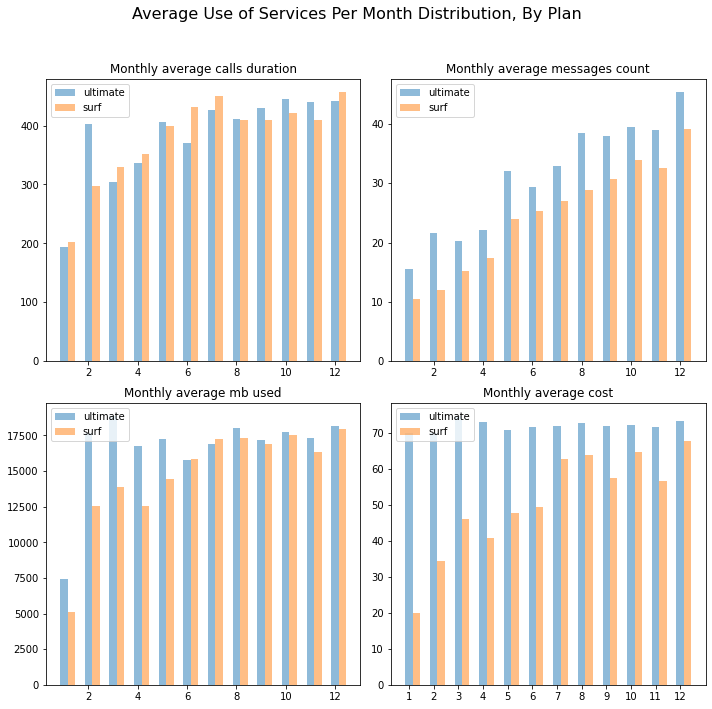

In [78]:
#### Plot the histograms in 2X2 subplot figure
fig, axarr = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle("Average Use of Services Per Month Distribution, By Plan", fontsize=16)

X_axis = np.arange(12)+1
width = 0.3

# Minutes graph

axarr[0, 0].bar(X_axis, umc['total_duration'], width, alpha=0.5, label='ultimate')
axarr[0, 0].bar(X_axis+width, smc['total_duration'], width, alpha=0.5, label='surf')
axarr[0, 0].set_title('Monthly average calls duration')
axarr[0, 0].legend(loc='upper left')
plt.xticks(X_axis)

# Messages graph 
axarr[0, 1].bar(X_axis, umt['total_txt'], width, alpha=0.5, label='ultimate')
axarr[0, 1].bar(X_axis+width, smt['total_txt'], width, alpha=0.5, label='surf')
axarr[0, 1].set_title('Monthly average messages count')
axarr[0, 1].legend(loc='upper left')
plt.xticks(X_axis)

# Internet graph  
axarr[1, 0].bar(X_axis, umd['total_mb_rounded'], width, alpha=0.5, label='ultimate')
axarr[1, 0].bar(X_axis+width, smd['total_mb_rounded'], width, alpha=0.5, label='surf')
axarr[1, 0].set_title('Monthly average mb used')
axarr[1, 0].legend(loc='upper left')
plt.xticks(X_axis)

# Total cost graph 
axarr[1, 1].bar(X_axis, umtc['total_cost'], width, alpha=0.5, label='ultimate')
axarr[1, 1].bar(X_axis+width, smtc['total_cost'], width, alpha=0.5, label='surf')
axarr[1, 1].set_title('Monthly average cost')
axarr[1, 1].legend(loc='upper left')
plt.xticks(X_axis);

fig.tight_layout()
fig.subplots_adjust(top=0.88)

#### Variance analysis

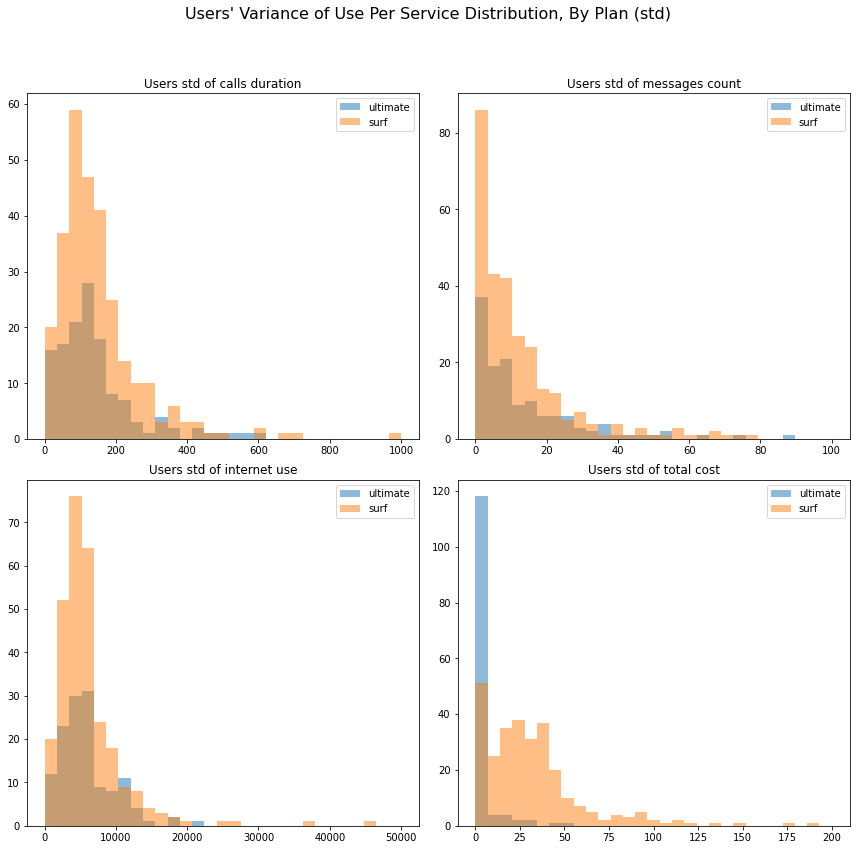

In [79]:
#Aggregate minutes (call duration) std by user

#### Plot the histograms in 2X2 subplot figure
fig, axarr = plt.subplots(2, 2,figsize=(12,12))
fig.suptitle("Users' Variance of Use Per Service Distribution, By Plan (std)", fontsize=16)

# Minutes graph
uc = ultimate_data.pivot_table(index = 'user_id', values='total_duration',aggfunc='std')
sc = surf_data.pivot_table(index = 'user_id', values='total_duration',aggfunc='std')
bins = np.linspace(0, 1000, 30)
axarr[0, 0].hist(uc.values, bins, alpha=0.5, label='ultimate')
axarr[0, 0].hist(sc.values, bins, alpha=0.5, label='surf')
axarr[0, 0].set_title('Users std of calls duration')
axarr[0, 0].legend(loc='upper right');

# Messages graph
ut = ultimate_data.pivot_table(index = 'user_id', values='total_txt',aggfunc='std')
st = surf_data.pivot_table(index = 'user_id', values='total_txt',aggfunc='std')
bins = np.linspace(0, 100, 30)
axarr[0, 1].hist(ut.values, bins, alpha=0.5, label='ultimate')
axarr[0, 1].hist(st.values, bins, alpha=0.5, label='surf')
axarr[0, 1].set_title('Users std of messages count')
axarr[0, 1].legend(loc='upper right');

# Internet graph
ud = ultimate_data.pivot_table(index = 'user_id', values='total_mb_rounded',aggfunc='std')
sd = surf_data.pivot_table(index = 'user_id', values='total_mb_rounded',aggfunc='std')
bins = np.linspace(0, 50000, 30)
axarr[1, 0].hist(ud.values, bins, alpha=0.5, label='ultimate')
axarr[1, 0].hist(sd.values, bins, alpha=0.5, label='surf')
axarr[1, 0].set_title('Users std of internet use')
axarr[1, 0].legend(loc='upper right');


#Total_cost graph
utc = ultimate_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='std')
stc = surf_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='std')
bins = np.linspace(0, 200, 30)
axarr[1, 1].hist(utc.values, bins, alpha=0.5, label='ultimate')
axarr[1, 1].hist(stc.values, bins, alpha=0.5, label='surf')
axarr[1, 1].set_title('Users std of total cost')
axarr[1, 1].legend(loc='upper right');

fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [80]:
# Calculating each plan variance of mean monthly revenue
print('Ultimate plan mean monthly revenue variance: {}'.format(np.var(utc)));

print('Surf plan mean monthly revenue variance: {}'.format(np.var(stc)));

Ultimate plan mean monthly revenue variance: total_cost    64.608113
dtype: float64
Surf plan mean monthly revenue variance: total_cost    1631.598535
dtype: float64


### Conclusions:
#### Means
Calls - both plan have normal distributions. the means are also very close (around 399 minutes). the number of users gets lower as the mean use gets low or high from the average.
Messages - both plans have positive skewed distribution, which means that most of the users consume small number of text messages, and the number of users gets down as the use gets up.
The mean messages count is 32 for surf plan and 38 for ultimate
Internet - The distributions are normal and the mean mb used is also very close between the two plans, around 16,000
Total cost - here we observe a significant difference. surf plan has positive skewed distribution with mean of 57$, which mean that most of the users pay the basic monthly pay + small addition, and some users that use much more then the basic, pull the mean up to 57.
The story is different with ultimate plan, where there is almost no dispersion: most of the users pay only the basic payment. the mean is 72.

#### Monthly mean
We can see a trend of growth of use over the months, in calls, messages and internet use. there is a big jump between january and february, and then more gradual growth. the same trend is observed in surf plan total cost. the total cost of ultimate plan is quite stable over the year.

#### Variance
Calls - The variance show normal distribution. the meaning is that some of the users have static behaviour in consuming of calls, and some are not. the mean variance is around 100 std.
Messages - positive skew distribution. most of the users have constant behavior.
Internet - Normal distribution, with long positive tail. which means that some of the users have constant behaviour, and others internet comsumption changes very much.
Total cost - Like with the mean, the surf plan users show normal distribution of the costs, that are changes according to the use. the ultimate plan total cost variance is very small. 

## Testing the hypotheses

### Hypothesis: The average revenue from users of Ultimate and Surf calling plans differs

Ho: The average profit of Ultimate equals the average profit of Surf

Ho: 𝜇_1=𝜇_2

H1: 𝜇_1!=𝜇_2

In [81]:
# In order to determine if the samples have the same variance we will run levene test
# Nevertheless, from the graphs we can see that the variances are different
from scipy.stats import levene

#Ho: σ_1=σ_2

#H1: σ_1!=σ_2
    
alpha = 0.05  # critical statistical significance level

stat, p = levene(utc['total_cost'], stc['total_cost'], center='mean')
print('p=', p)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p= 9.040007488271299e-10
We reject the null hypothesis


In [82]:
# For testing the hypothesis we will run ttest (comparing means with unknown variance) for 2 independent samples 
# The assumption on the equality of the samples variance was rejected
# so we add the parameter equal_var = False
from scipy import stats as st
import numpy as np

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(utc, stc,equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  [1.43852724e-29]
We reject the null hypothesis


### Conclusion: 
We rejected the null assumption on the equality of total cost means of the two plans.

We can say that there is a very small probability of randomly getting a difference that size or larger.

This probability is clearly too small to conclude that there is no significant difference between the average total costs.

### Hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.

Ho: The average profit from users in NY-NJ area equals the average profit from users from other regions

Ho: 𝜇_1=𝜇_2

H1: 𝜇_1!=𝜇_2

In [83]:
# First we will split the data into two samples: 'NY-NJ' and 'Other'
NY_NJ_data = users_monthly_use_plan.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
Other_regions_data = users_monthly_use_plan.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

#Aggregate total_cost mean by user
ny_tc = NY_NJ_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='mean')
ot_tc = Other_regions_data.pivot_table(index = 'user_id', values='total_cost',aggfunc='mean')

stat, p = levene(ny_tc['total_cost'], ot_tc['total_cost'], center='mean')
print('p=', p)

p= 0.9488080261771334


In [84]:
#Test the hypothesis
# For testing the hypothesis we will run ttest (comparing means with unknown variance) for 2 independent samples 
# We can assume that the samples has equal variance. since they are categorized by client location they should be the same.
# I tested it with levene test and p = 0.98

alpha = 0.05  # critical statistical significance level

# if the p-value is less than alpha, we reject the hypothesis
results = st.ttest_ind(ny_tc, ot_tc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  [0.51280268]
We can't reject the null hypothesis


### Conclusion:
We can't rejected the null assumption on the equality of total cost means of the two samples.
We can say that there is a very high (52%) probability of randomly getting a difference that size or larger. This probability is clearly too high to conclude that there is a significant difference between the average total costs of users from NY-NJ and those from other cities.

## Overall conclusion

### users'  mean consumption
- Calls - both plan have normal distributions. the means are also very close (around 399 minutes). the number of users gets lower as the mean use gets low or high from the average. 
- Messages - both plans have positive skewed distribution, which means that most of the users consume small number of text messages, and the number of users gets down as the use gets up. The mean messages count is 32 for surf plan and 38 for ultimate.
- Internet - The distributions are normal and the mean mb used is also very close between the two plans, around 16,000. 
- Total cost - here we observe a significant difference. surf plan has positive skewed distribution with mean of 57, which means that most of the users pay the basic monthly pay + small addition, and some users that use much more then the basic, pull the mean up to 57. The story is different with ultimate plan, where there is almost no dispersion: most of the users pay only the basic payment. the mean is 72.

### Monthly mean
We can see a trend of growth of use over the months, in calls, messages and internet use. there is a big jump between january and february, and then more gradual growth. the same trend is observed in surf plan total cost. the total cost of ultimate plan is quite stable over the year.

### Variance
- Calls - The variance show normal distribution. the meaning is that some of the users have static behaviour in consuming of calls, and some are not. the mean variance is around 100 std.
- Messages - positive skew distribution. most of the users have constant behavior.
- Internet - Normal distribution, with long positive tail. which means that some of the users have constant behaviour, and others internet comsumption changes very much.
- Total cost - Like with the mean, the surf plan users show normal distribution of the costs, that are changes according to the use. the ultimate plan total cost variance is very small.

### Hypothsis testing
The results of the hypothesis testing showed there is a significant difference between 'surf' and 'ultimate' plans mean revenue per client. the means are 57 $ for surf and 72 for ultimate.

Looking at the average use of services we saw that the mean actual use of services is quite the same for the two plans customers:

calls:    both 399
messages: surf 32, ultimate 38
Internet: both 16,000 mb 

### Summary
In the bottom line, ultimate plan users consume in the average the same amount of services as those with 'surf' plan, but pay much more!
'ultimate' plan is more profitable and brings more revenues, so the company should invest in advertising it.  